<a href="https://colab.research.google.com/github/seungwoo-Jang/modu_quest/blob/main/EXPLORATION_RS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

Iteration 100 : Loss 108.2547
Iteration 200 : Loss 94.8068
Iteration 300 : Loss 82.0766
Iteration 400 : Loss 70.3783
Iteration 500 : Loss 60.1453
Iteration 600 : Loss 51.8755
Iteration 700 : Loss 45.9211
Iteration 800 : Loss 42.1968
Iteration 900 : Loss 40.1611
Iteration 1000 : Loss 39.1541
Iteration 1100 : Loss 38.6848
Iteration 1200 : Loss 38.4727
Iteration 1300 : Loss 38.3783
Iteration 1400 : Loss 38.3365
Iteration 1500 : Loss 38.3181
Iteration 1600 : Loss 38.3100
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


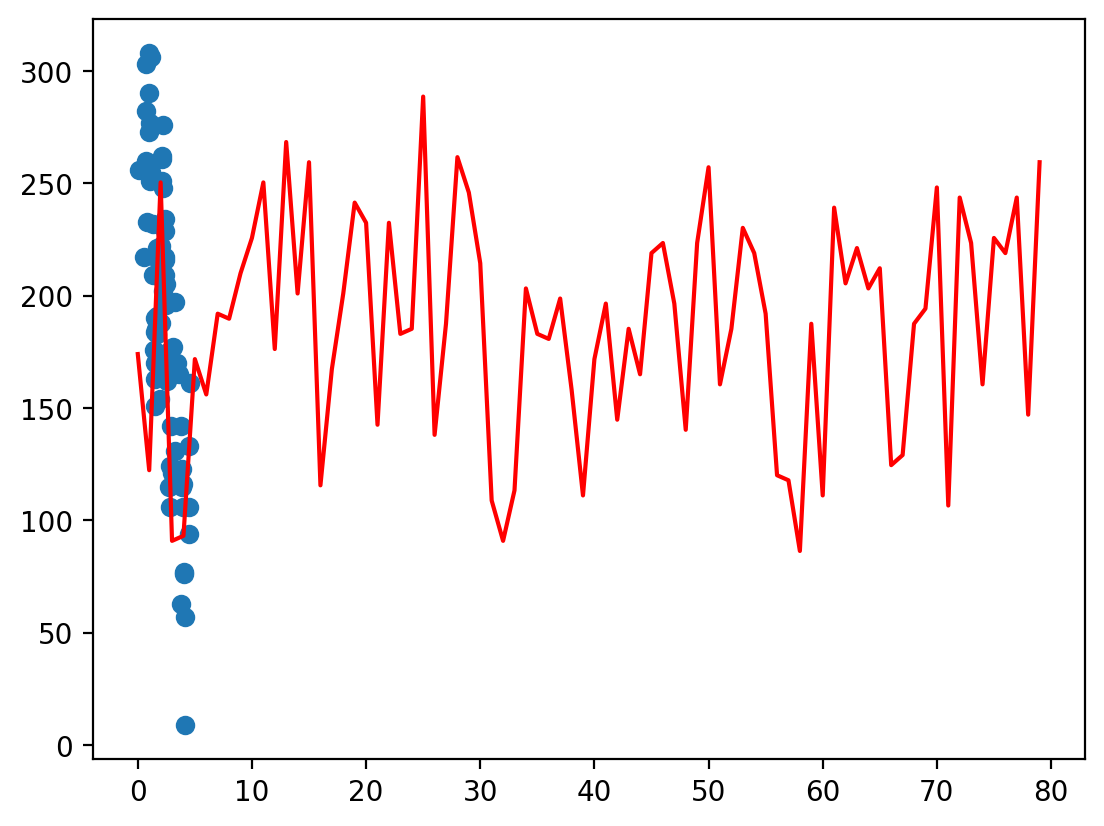

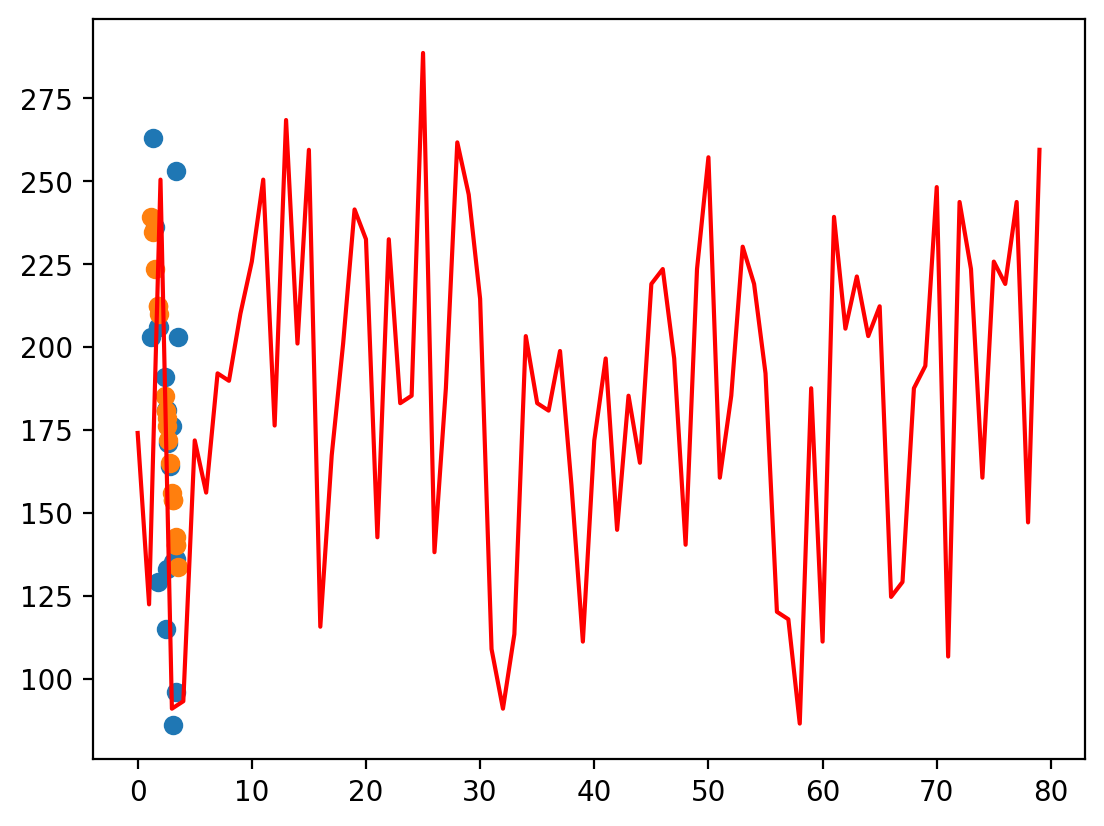

In [1]:
import pandas as pd
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy as np

# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

#파일 불러오기 
csv_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E01/macbook.csv'
macbook = pd.read_csv(csv_path)
# print(macbook.shape) #(80, 2)

#관계 그래프 
# plt.scatter(macbook['used_years'], macbook['price'])

# np.corrcoef(macbook['used_years'], macbook['price'])
#0,0 1,1 본인과의 상관계수 0,1 1,0 상대와의 상관계수

x = macbook['used_years'].values #1차원 배열로 전달
y = macbook['price'].values #1차원 배열로 전달

#임의의 가중치 
w,b = 1,1

#선형 회귀 모델
def model_func(x,w,b):
  y = w * x + b
  return y
macbook['prediction'] = model_func(x,w,b)

macbook['error'] = macbook['price'] - macbook['prediction']
#RMSE 오차함수
def rmse_func(a,b):
  mse = ((a-b)**2).mean()
  rmse = mse ** 0.5
  return rmse
# rmse = rmse_func(macbook['price'],macbook['prediction'])

losses = []
#손실함수
def loss_func(x,w,b,y):
  prediction = model_func(x,w,b)
  l = rmse_func(y, prediction)
  return l

#기울기
learning_rate=0.0001
def gradient_func(x,w,b,y):
  dw = (loss_func(x,w+learning_rate,b,y) - loss_func(x,w,b,y)) / learning_rate
  db = (loss_func(x,w,b+learning_rate,y) - loss_func(x,w,b,y)) / learning_rate
  # 학습률로 나누는 것은 파라미터 업데이트의 크기를 조절하여 학습 과정을 안정화시키고, 최적점에 수렴할 수 있도록 하는 역할
  # 학습률이 크면 업데이트 값은 작아지고, 학습률이 작으면 업데이트 값은 커지게 됩니다.
  return dw,db

#훈련
for i in range(1,2001):
  dw,db = gradient_func(x,w,b,y)
  w -= dw
  b -= db
  L = loss_func(x,w,b,y)
  losses.append(L)
  if i % 100 == 0:
    print('Iteration %d : Loss %0.4f' % (i, L))

# 손실함수 그래프 
# plt.plot(losses)
# plt.show()

#w,b 결과
# print(w,b)

#결과에 따른 선형그래프
y = model_func(x,w,b)
plt.plot(y, c='r')
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#테스트 데이터로 확인
csv_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E01/macbook_test.csv'
test = pd.read_csv(csv_path)

test_x = test['used_years'].values
test_y = test['price'].values

prediction = model_func(test_x,w,b)
test['prediction'] = prediction

test['error'] = test['price'] - test['prediction']

rmse = rmse_func(test['price'], test['prediction'])

plt.plot(y, c='r')
plt.scatter(test['used_years'],test['price'])
plt.scatter(test['used_years'],test['prediction'])
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

tips = sns.load_dataset("tips")
# print(tips.shape)
# tips.head()

tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
#범주형(categorical) 변수를 원-핫 인코딩(one-hot encoding) 형식으로 변환해주는 역할
tips.head()

tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
#y 컬럼을 맨 우측으로 이동한 것
# tips.head()

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

W = np.random.rand(12)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i] #X[:,i] : i행 전체 
    predictions += b #공통상수라 한 번 
    return predictions

def MSE(a, b):
    mse = ((a-b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산 
    # 13가지의 매개변수에 대해 손실함수를 13번 미분
    # 한 열에 13가지 데이터가 들어있어서 1가지 데이터끼리 계산하기 위해 Tranpose 진행
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# dW, db = gradient(X, W, b, y)

LEARNING_RATE = 0.0001

losses = []

for i in range(1, 40):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()


#사이킷런(sklearn) 라이브러리를 활용
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()


0, loss 20694.9756
100, loss 5159.1635
200, loss 4677.0253
300, loss 4324.0861
400, loss 4062.4137
500, loss 3865.5395
600, loss 3714.9632
700, loss 3597.7260
800, loss 3504.7261
900, loss 3429.5481


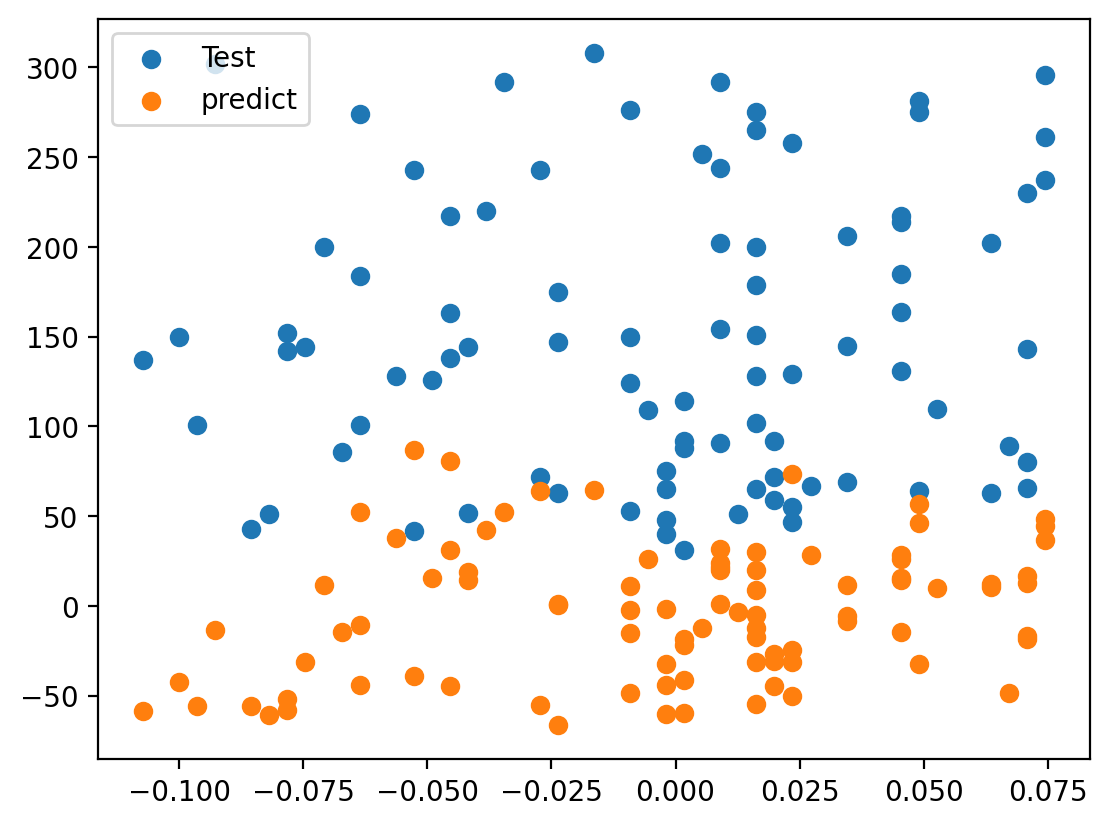

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

data = load_diabetes()

df_x = pd.DataFrame(data.data,columns=data.feature_names)
df_y = pd.DataFrame(data.target,columns=['target'])

arr_x = df_x.values
arr_y = df_y.values[:,0]
# arr_y = df_y.values[:,0] / 152 #평준화

x_train,x_test,y_train,y_test = train_test_split(arr_x,arr_y,
                                                    test_size=0.2,
                                                    random_state = 10)

W = np.random.rand(x_train.shape[1])
b = np.random.rand()
dW = 0
db = 0


def build_model(X,W,b):
  predict = np.dot(X,W)+b
  return predict

def loss(X,W,b,y):
  predict = build_model(X,W,b)
  L = ((y - predict) ** 2).mean()
  return L

def gradient(X,W,b,y,dW,db):
  N = len(y)
  predict = build_model(X,W,b)
  dW = 1/N * -2 * np.dot(X.T,(y-predict))
  db = -2 * (y - predict).mean()
  return dW,db

def training(X,W,b,y,dW,db,cnt=1000,learning_rate=0.1):
  for i in range(cnt):
    dW,db = gradient(X,W,b,y,dW,db)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X,W,b,y)
    if i % 100 == 0:
      print(f'{i}, loss {L:.4f}')
  return W,b

def test_val(X,W,b,y):
  predict = build_model(X,W,b)
  mse = loss(X,W,b,y)
  visual(X,predict,y)

def visual(X,predict,y):
  plt.scatter(x_test[:,0],y_test, label='Test')
  plt.scatter(x_test[:,0],predict, label='predict')
  plt.legend()
  plt.show()
  
results = training(x_train,W,b,y_train,dW,db)
test_val(x_test,W,b,y_test)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.
'''

#데이터 가져오기
csv_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E01/train.csv'
data = pd.read_csv(csv_path)

data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data.describe()

#컬럼 생성 
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second
data.head()

#데이터 개수 시각화하기
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols=2)
figure.set_size_inches(15,7)
figure.subplots_adjust(hspace=0.5)

sns.countplot(data=data, x='year', ax=ax1)
sns.countplot(data=data, x='month', ax=ax2)
sns.countplot(data=data, x='day', ax=ax3)
sns.countplot(data=data, x='hour', ax=ax4)
sns.countplot(data=data, x='minute', ax=ax5)
sns.countplot(data=data, x='second', ax=ax6)

#X, y 컬럼 선택 및 train/test 데이터 분리
X = data[['season','holiday','workingday','weather', 'temp', 
         'humidity', 'windspeed','year', 'month', 'day', 'hour']].values
y = data['count'].values
type(X)

# 평준화
# for i in range(X.shape[1]):
#   X[:,i] /= X[:,i].mean()

y = y.astype(float) 
y /= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#LinearRegression 모델 학습
model = LinearRegression()

model.fit(X_train,y_train)

#학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)
print(f'predict : {y_pred}')
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)
print(f'rmse : {rmse}')

#x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
#X 데이터가 원본데이터인데 예측결과를 어떻게 표현해야할지 모르겠어여ㅠ
df = pd.DataFrame({'temp':X[:,4], 'humidity':X[:,5], 'count':y})

figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows= 2, ncols=2)
figure.set_size_inches(15,7)
figure.subplots_adjust(hspace=0.5)

sns.scatterplot(data=data, x='temp', y = 'count', ax=ax1)
sns.scatterplot(data=df, x='temp', y = 'count', ax=ax2)
sns.scatterplot(data=data, x='humidity', y = 'count', ax=ax3)
sns.scatterplot(data=df, x='humidity', y = 'count', ax=ax4)


(10886,)

# 2. 나의 첫 번째 캐글 경진대회, 무작정 따라해보기